In [1]:
import sys
import os
sys.path.append(os.path.abspath('..'))

In [2]:
from helper import *
from copy import deepcopy

# Device detection and setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
if torch.cuda.is_available():
    print(f"CUDA device: {torch.cuda.get_device_name(0)}")
    print(f"CUDA memory: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.1f} GB")

set_seed = 42

Using device: cuda
CUDA device: NVIDIA GeForce RTX 4060 Ti
CUDA memory: 16.0 GB


In [3]:
# Iris Network
class IrisNet(nn.Module):
    def __init__(self):
        super(IrisNet, self).__init__()
        self.fc1 = nn.Linear(4, 256)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(256, 256)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(256, 3)

    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.fc3(x)
        return x

In [4]:
# Iris Dataset
iris = sklearn_datasets.load_iris()
X_iris = torch.FloatTensor(iris.data)
y_iris = torch.LongTensor(iris.target)

# Shuffle the dataset before splitting (deterministic with seed)
np.random.seed(42)
indices = np.random.permutation(len(X_iris))
X_iris_shuffled = X_iris[indices]
y_iris_shuffled = y_iris[indices]

# Split into train/test
split = int(0.90 * len(X_iris_shuffled))
X_iris_train, X_iris_test = X_iris_shuffled[:split], X_iris_shuffled[split:]
y_iris_train, y_iris_test = y_iris_shuffled[:split], y_iris_shuffled[split:]

iris_train_loader = DataLoader(TensorDataset(X_iris_train, y_iris_train), batch_size=32, shuffle=False)
iris_test_loader = DataLoader(TensorDataset(X_iris_test, y_iris_test), batch_size=32, shuffle=False)

All seeds set to: 0
Model weights initialized with seed: 0
All seeds set to: 1
Model weights initialized with seed: 1
All seeds set to: 2
Model weights initialized with seed: 2
All seeds set to: 3
Model weights initialized with seed: 3
All seeds set to: 4
Model weights initialized with seed: 4


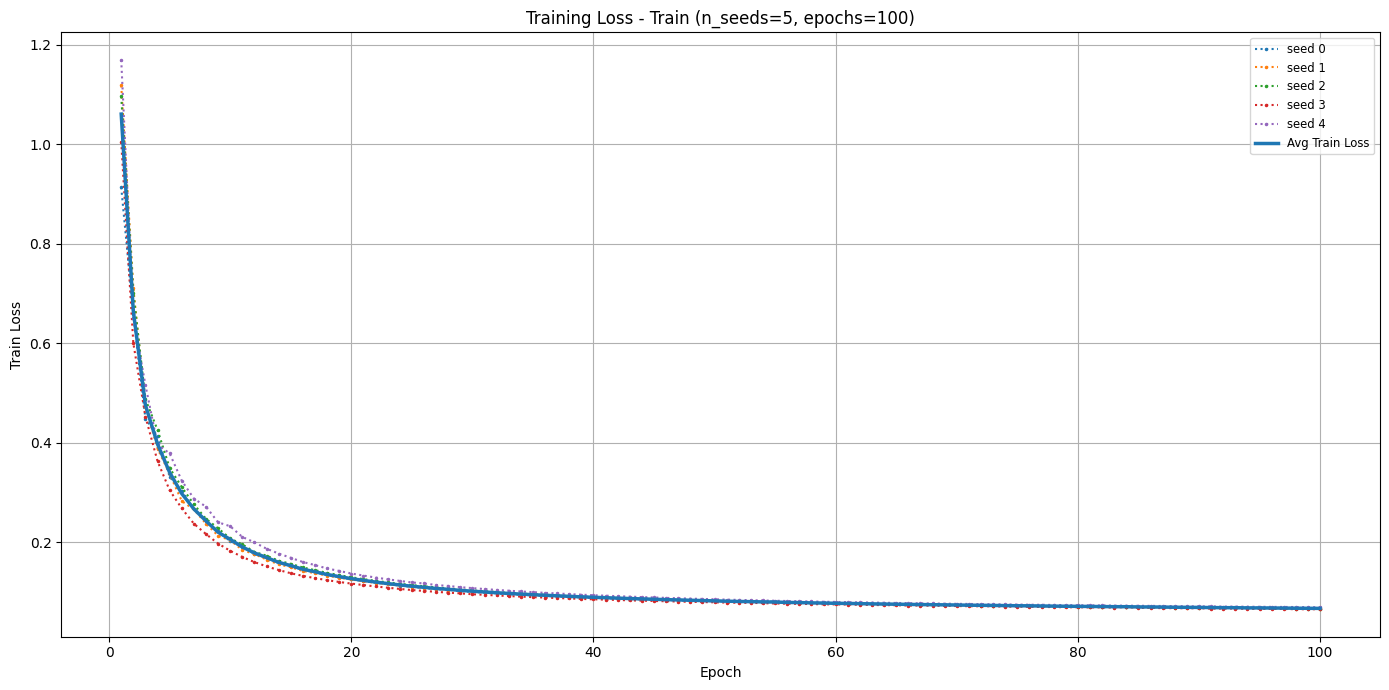

In [5]:
results_train = train_multiple_inits_and_plot(
    network_fn=lambda: IrisNet(),
    train_loader=iris_train_loader,
    criterion=nn.CrossEntropyLoss(),
    optimizer_fn=lambda m: optim.Adam(m.parameters(), lr=0.001),
    seeds=[0,1,2,3,4],
    num_epochs=100,                    # short for smoke test
    figsize=(14,7),
    plot_val=True,
    alpha=1
)

All seeds set to: 0
Model weights initialized with seed: 0
All seeds set to: 1
Model weights initialized with seed: 1
All seeds set to: 2
Model weights initialized with seed: 2
All seeds set to: 3
Model weights initialized with seed: 3
All seeds set to: 4
Model weights initialized with seed: 4


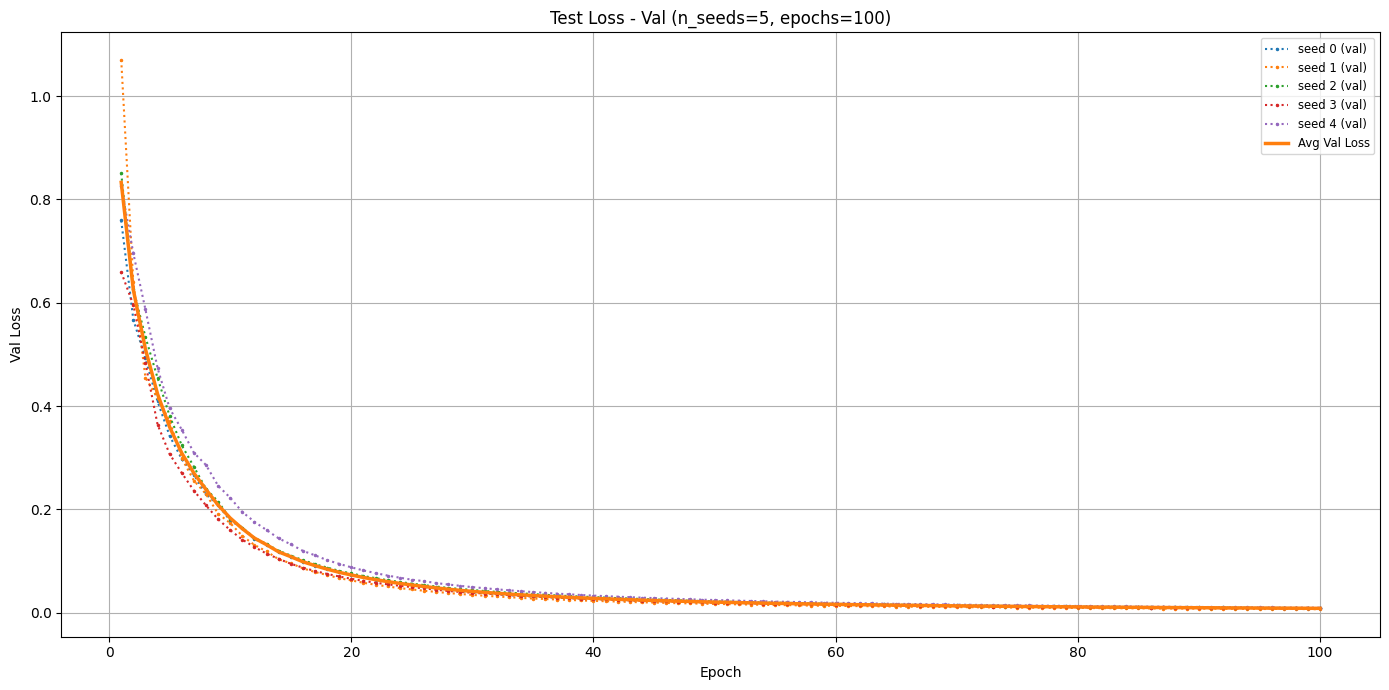

In [6]:
results_test = train_multiple_inits_and_plot(
    network_fn=lambda: IrisNet(),
    train_loader=iris_train_loader,
    criterion=nn.CrossEntropyLoss(),
    optimizer_fn=lambda m: optim.Adam(m.parameters(), lr=0.001),
    seeds=[0,1,2,3,4],
    num_epochs=100,
    figsize=(14,7),
    test_loader=iris_test_loader,   # required for val runs
    plot_val=True,                  # allow val runs to be recorded/used
    loss_view="val",                # show only validation (test) loss
    alpha=1,
    title_prefix="Test Loss"
)